In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("/Users/bhargavic/Downloads/Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [87]:
df.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
df.isnull().sum().sum()

np.int64(136534)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
(135080/541909)*100

24.926694334288598

In [11]:
(1454/541909)*100

0.2683107311375157

In [12]:
df["Description"] = df["Description"].fillna("Unknown")


In [13]:
df_sales = df.copy()   # keep everything for revenue & product trends


In [14]:

df_customers = df.dropna(subset=["CustomerID"])  # only for customer behavior

#Approximately 25% of transactions lacked customer identifiers, likely representing guest purchases. These records were retained for sales and product analysis but excluded from customer-level behavior analysis to ensure accurate customer insights.
Transactions without customer identifiers were retained for sales and product performance analysis, while customer-level insights were derived only from identified customers to preserve analytical accuracy.

In [15]:
cancelled = df_sales["InvoiceNo"].astype(str).str.startswith("C")

df_sales = df_sales[cancelled == False]


In [16]:
df_sales = df_sales[df_sales["Quantity"] > 0]
df_sales = df_sales[df_sales["UnitPrice"] > 0]


In [17]:
df_sales["Quantity"].describe()


count    530104.000000
mean         10.542037
std         155.524124
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [20]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**“Extreme values were retained as they reflect bulk purchases from high-value customers rather than data errors.”**

In [21]:
df_sales["Revenue"] = df_sales["Quantity"] * df_sales["UnitPrice"]


<Axes: >

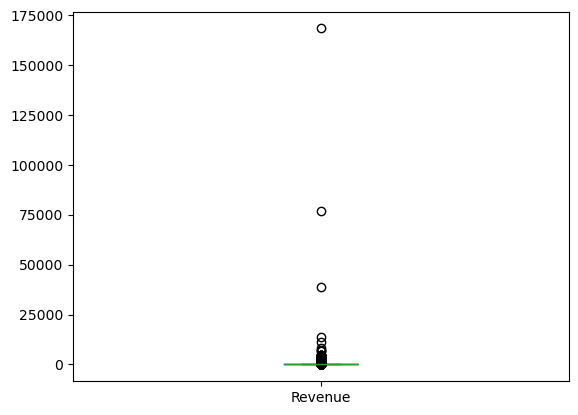

In [22]:
df_sales["Revenue"].plot(kind="box")

In [28]:
df_sales[df_sales["Year"] == 2010]["Month"].unique()


array([12], dtype=int32)

In [30]:
df_sales["Week"] = df_sales["InvoiceDate"].dt.isocalendar().week
df_sales["Month"] = df_sales["InvoiceDate"].dt.month


In [31]:
weekly_rev = df_sales.groupby("Week")["Revenue"].sum()
monthly_rev = df_sales.groupby("Month")["Revenue"].sum()


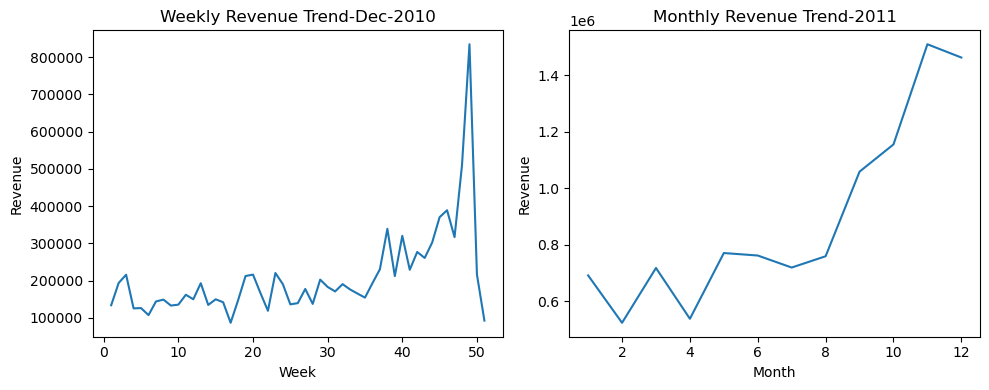

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Week-wise
plt.subplot(1,2,1)
weekly_rev.plot()
plt.title("Weekly Revenue Trend-Dec-2010")
plt.xlabel("Week")
plt.ylabel("Revenue")

# Month-wise
plt.subplot(1,2,2)
monthly_rev.plot()
plt.title("Monthly Revenue Trend-2011")
plt.xlabel("Month")
plt.ylabel("Revenue")

plt.tight_layout()
plt.show()


**Weekly revenue shows regular fluctuations, while monthly trends highlight strong seasonality with increased sales toward the end of the year.**
**November is the busiest sales month.**
**Sales peak in November, suggesting strong demand during the pre-holiday shopping period.**

**Business recommendation:

Marketing campaigns and inventory buildup should be prioritized in October and November to maximize peak season performance.**

In [88]:
monthly_rev.idxmax()


np.int32(11)

In [89]:
monthly_rev.max()

1509496.33

In [36]:
top_qty= df_sales.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_qty

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Description'>

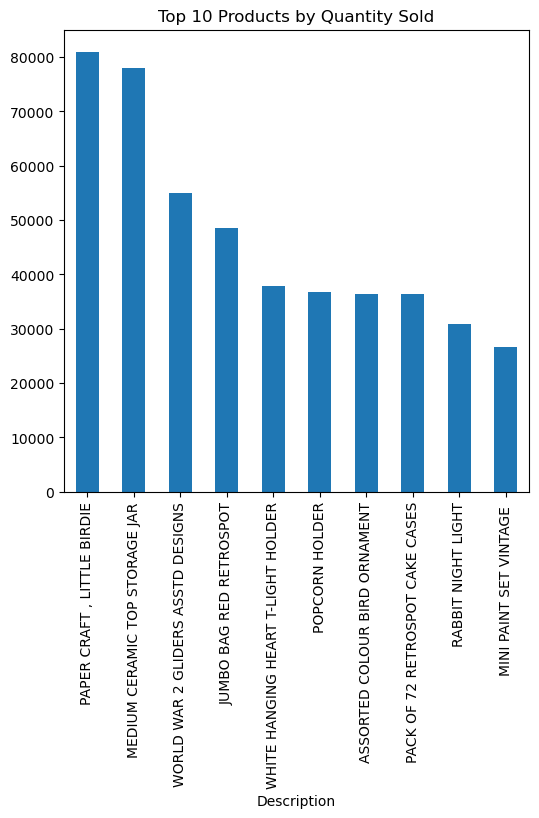

In [44]:
top_qty.plot(kind="bar", figsize=(6,6), title="Top 10 Products by Quantity Sold")
 #popular too


In [37]:
top_revenue = df_sales.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10).  #best selling products
top_revenue


Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Revenue, dtype: float64

<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='Description'>

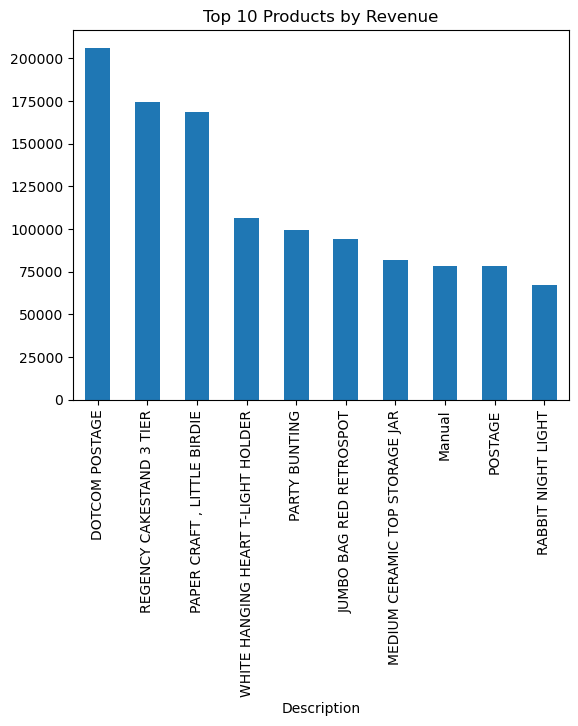

In [39]:
top_revenue.plot(kind="bar", title="Top 10 Products by Revenue") 


In [46]:
df_customers = df_sales.dropna(subset=["CustomerID"])


In [47]:
df_customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48


In [48]:
top_customers = df_customers.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head(10)
top_customers


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Revenue, dtype: float64

<Axes: title={'center': 'Top 10 Customers by Revenue'}, xlabel='CustomerID'>

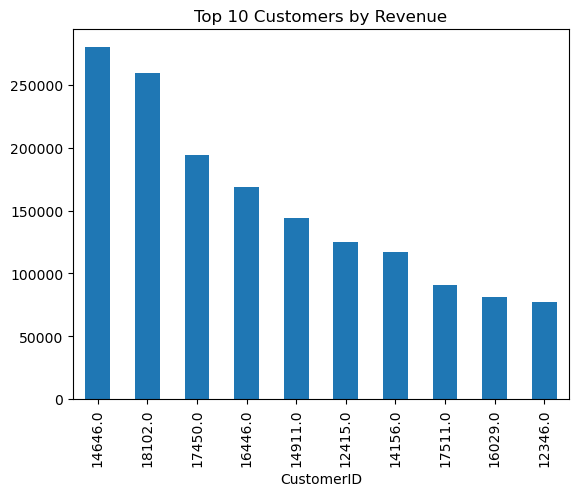

In [49]:
top_customers.plot(kind="bar", title="Top 10 Customers by Revenue")


**A small group of high-value customers contributes a significant portion of total revenue, highlighting the importance of retention and loyalty strategies.**

**customer loyalty**

In [50]:
purchase_counts = df_customers.groupby("CustomerID")["InvoiceNo"].nunique()

purchase_counts.describe()


count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: InvoiceNo, dtype: float64

In [51]:
purchase_counts.sort_values(ascending=False).head(10)


CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [52]:
customer_revenue = df_customers.groupby("CustomerID")["Revenue"].sum()

segments = pd.qcut(customer_revenue, 3, labels=["Low Value", "Mid Value", "High Value"])

segments.value_counts()


Revenue
Low Value     1446
Mid Value     1446
High Value    1446
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

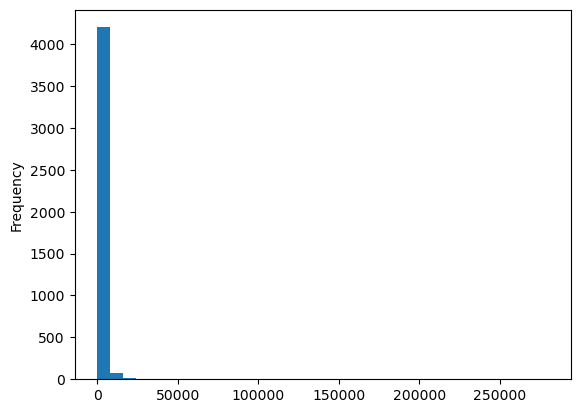

In [72]:
customer_revenue.plot(kind="hist", bins=35)


In [82]:
customer_revenue_sorted = customer_revenue.sort_values(ascending=False)

top_10_count = int(len(customer_revenue_sorted) * 0.10)
top_10_count 



433

In [83]:
top_10_revenue = customer_revenue_sorted.head(top_10_count).sum()
total_revenue = customer_revenue_sorted.sum()

share = top_10_revenue / total_revenue
share


np.float64(0.6133411711012168)

<Axes: title={'center': 'Revenue Contribution by Customer Group'}>

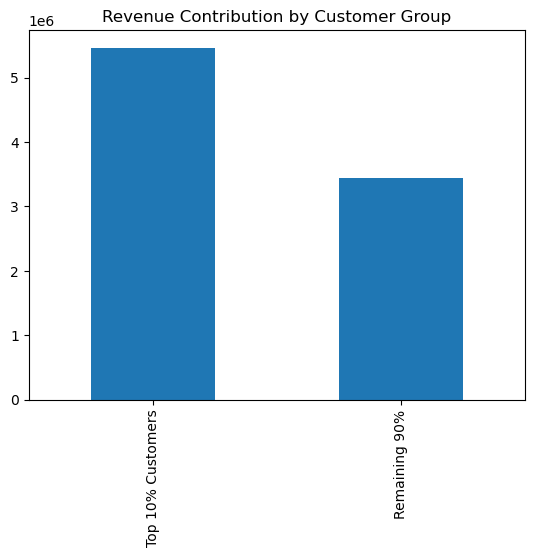

In [84]:
pd.Series({
    "Top 10% Customers": top_10_revenue,
    "Remaining 90%": total_revenue - top_10_revenue
}).plot(kind="bar", title="Revenue Contribution by Customer Group")


**The store’s most valuable customers were identified as those with the highest total revenue contribution, representing a small group of high-value buyers responsible for a significant share of sales**.

**Repeat purchase behavior**

In [73]:
repeat_cust=df_customers.groupby("CustomerID")["InvoiceNo"].nunique()
repeat_cust.describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: InvoiceNo, dtype: float64

In [75]:
repeat_cust.value_counts().sort_index().head(10)


InvoiceNo
1     1493
2      835
3      508
4      388
5      242
6      172
7      143
8       98
9       68
10      54
Name: count, dtype: int64

<Axes: title={'center': 'Number of Purchases per Customer'}, xlabel='InvoiceNo'>

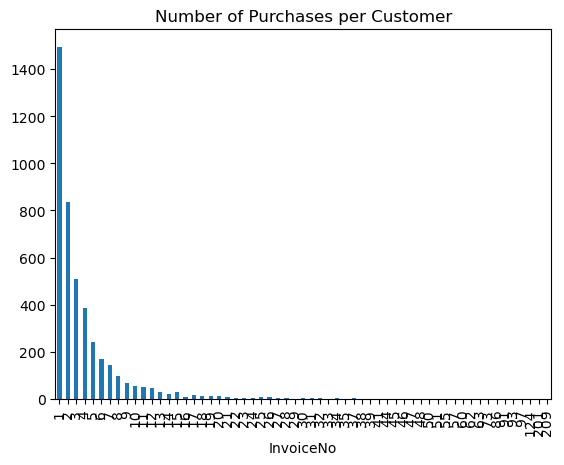

In [77]:
repeat_cust.value_counts().sort_index().plot(kind="bar", title="Number of Purchases per Customer")


**Most customers make only one or two purchases, while a small group shows strong repeat buying behavior, indicating opportunities for loyalty programs and retention strategies.**

In [64]:
vip_cust=customer_revenue.head(10)
vip_cust

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
12352.0     2506.04
12353.0       89.00
12354.0     1079.40
12355.0      459.40
12356.0     2811.43
Name: Revenue, dtype: float64

**Revenue is highly concentrated, with the top 10% of customers contributing over half of total sales, indicating strong dependence on a small high-value customer segment.**

In [85]:
popular_products = df_sales.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
popular_products


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

<Axes: title={'center': 'Top 10 Most Popular Products by Quantity Sold'}, xlabel='Description'>

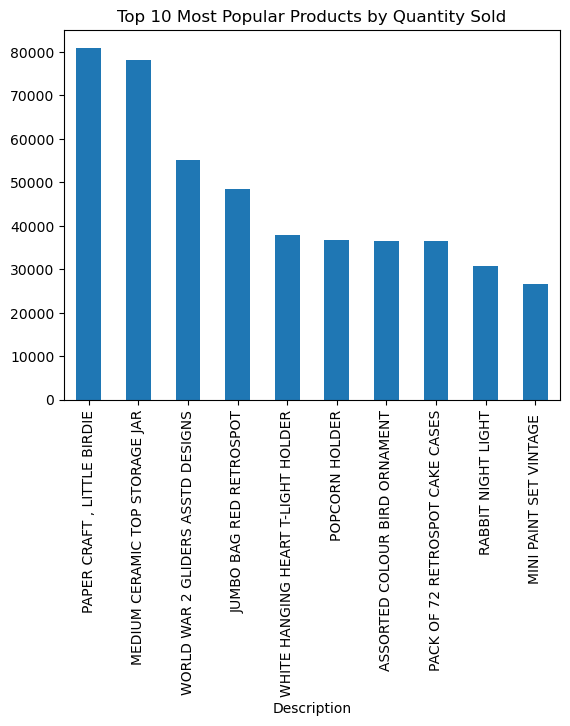

In [86]:
popular_products.plot(kind="bar", title="Top 10 Most Popular Products by Quantity Sold")


**A small group of products dominates sales volume, indicating key inventory items that should be consistently stocked.**

🌍 1. Country-wise insights-Country vs Revenue

<Axes: title={'center': 'Top Countries by Revenue'}, xlabel='Country'>

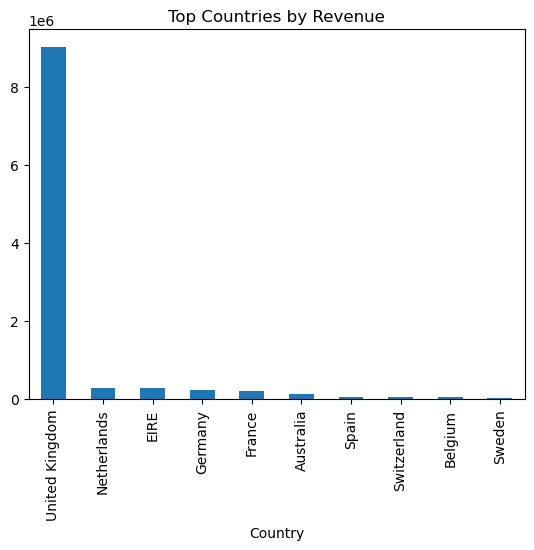

In [90]:
country_revenue = df_sales.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)
country_revenue.plot(kind="bar", title="Top Countries by Revenue")


**Insight:
UK markets drive most sales.**

In [ ]:
📦 **Country vs Popular Products**

In [91]:
country_product = df_sales.groupby(["Country","Description"])["Quantity"].sum().reset_index()

top_country_products = country_product.sort_values("Quantity", ascending=False).head(10)
top_country_products


,Country,Description,Quantity
17972,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
17638,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,77036
19511,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49526
17404,United Kingdom,JUMBO BAG RED RETROSPOT,44264
19422,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,35740
18262,United Kingdom,POPCORN HOLDER,34738
15821,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,33735
17888,United Kingdom,PACK OF 12 LONDON TISSUES,25127
17922,United Kingdom,PACK OF 72 RETROSPOT CAKE CASES,24986
19254,United Kingdom,VICTORIAN GLASS HANGING T-LIGHT,23692


**The majority of sales originate from the UK market, indicating that business performance is primarily driven by domestic customers, with international sales contributing a smaller share.**

** VIP customer behavior **

<Axes: title={'center': 'Top Products Purchased by VIP Customers'}, xlabel='Description'>

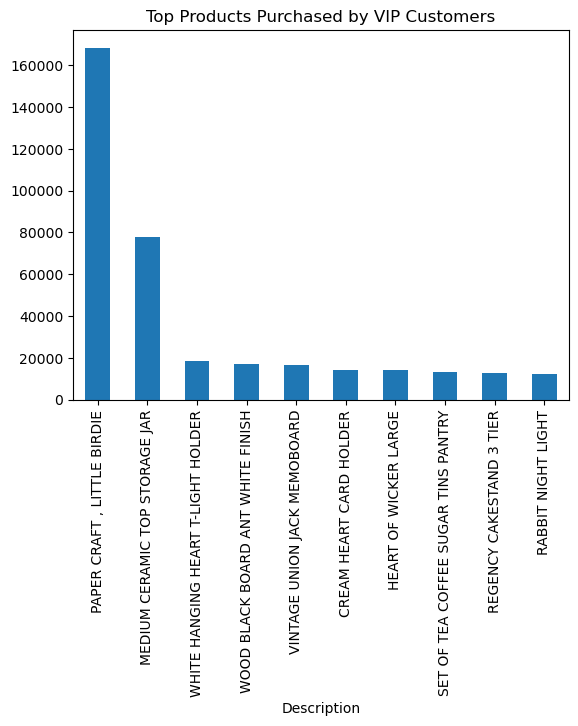

In [92]:
vip_customers = customer_revenue_sorted.head(10).index

vip_products = df_customers[df_customers["CustomerID"].isin(vip_customers)] \
                .groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)

vip_products.plot(kind="bar", title="Top Products Purchased by VIP Customers")


**Insight:
Premium vs bulk patterns.**

🔁 Loyalty vs spending

<Axes: title={'center': 'Loyalty vs Total Spending'}, xlabel='InvoiceNo', ylabel='Revenue'>

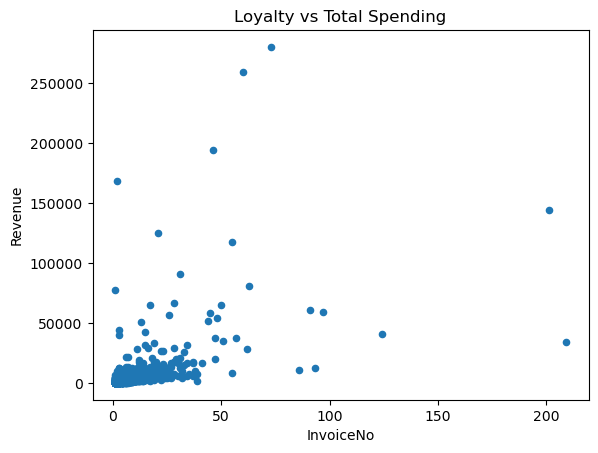

In [93]:
loyalty_revenue = df_customers.groupby("CustomerID").agg({
    "InvoiceNo":"nunique",
    "Revenue":"sum"
})

loyalty_revenue.plot(kind="scatter", x="InvoiceNo", y="Revenue", title="Loyalty vs Total Spending")


Insight:
Repeat buyers spend more.
👉 Customers to the RIGHT

= people who purchased many times (loyal customers)

👉 Customers at the TOP

= people who spent a lot (high value)

🎯 The pattern you should notice

Most dots are:

⬅ left & low → one-time or low spenders (very common)

Few dots are:

➡ far right & high up → loyal + high spenders (VIP customers)

Customers with higher purchase frequency generally generate greater total revenue, highlighting the importance of retention strategies.

In [94]:
df_sales[["Quantity","UnitPrice","Revenue"]].corr()


,Quantity,UnitPrice,Revenue
Quantity,1.000000,-0.003773,0.907338
UnitPrice,-0.003773,1.000000,0.137404
Revenue,0.907338,0.137404,1.000000


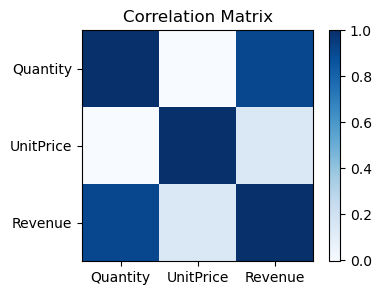

In [98]:
import matplotlib.pyplot as plt

corr = df_sales[["Quantity", "UnitPrice", "Revenue"]].corr()

plt.figure(figsize=(4,3))
plt.imshow(corr, cmap="Blues")   # 👈 all blue theme
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.show()


**Revenue is driven by both sales volume and product pricing, while higher-priced items tend to be purchased less frequently.**

In [95]:
(df_sales["Quantity"] <= 0).sum()
(df_sales["UnitPrice"] <= 0).sum()
df_sales["InvoiceNo"].astype(str).str.startswith("C").sum()


np.int64(0)

In [96]:
df_sales["Revenue"].describe()


count    530104.000000
mean         20.121871
std         270.356743
min           0.001000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: Revenue, dtype: float64